In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path = '/content/gdrive/My Drive/mtsamples.csv'

In [ ]:
test_path = '/content/gdrive/My Drive/Train.csv'

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

#plot
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action

In [ ]:
medical_data = pd.read_csv(train_path, index_col=0)

In [ ]:
len(medical_data)

4999

In [ ]:
medical_data = medical_data[['transcription','medical_specialty']]

In [ ]:
medical_data.dropna(inplace=True)

In [ ]:
len(medical_data)

4966

In [ ]:
len(medical_data)

3898

In [ ]:
round(100*(medical_data.isnull().sum()/len(medical_data.index)),2)

transcription        0.0
medical_specialty    0.0
dtype: float64

In [ ]:
medical_data = medical_data.drop_duplicates(subset=['transcription'], keep='first')

In [ ]:
len(medical_data)

2357

In [ ]:
notes_list = [' Letters', ' SOAP / Chart / Progress Notes', ' Emergency Room Reports',
              ' Discharge Summary', ' Consult - History and Phy.', ' Office Notes']
def remove_notes(row, notes_list):


In [ ]:
medical_data = medical_data[~medical_data['medical_specialty'].isin([' Letters'])]
medical_data = medical_data[~medical_data['medical_specialty'].isin([' SOAP / Chart / Progress Notes'])]
medical_data = medical_data[~medical_data['medical_specialty'].isin([' Emergency Room Reports'])]
medical_data = medical_data[~medical_data['medical_specialty'].isin([' Discharge Summary'])]
medical_data = medical_data[~medical_data['medical_specialty'].isin([' Consult - History and Phy.'])]
medical_data = medical_data[~medical_data['medical_specialty'].isin([' Office Notes'])]

In [ ]:
len(medical_data)

2076

In [ ]:
medical_data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep Medicine', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Pain Management', ' Orthopedic', ' Ophthalmology',
       ' Obstetrics / Gynecology', ' Neurosurgery', ' Nephrology',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Dermatology', ' Cosmetic / Plastic Surgery', ' Chiropractic',
       ' Autopsy'], dtype=object)

In [ ]:
medical_data.groupby('medical_specialty').count()['transcription'].reset_index()

,medical_specialty,transcription
0,Allergy / Immunology,1
1,Autopsy,8
2,Bariatrics,10
3,Cardiovascular / Pulmonary,26
4,Chiropractic,2
5,Cosmetic / Plastic Surgery,2
6,Dentistry,1
7,Dermatology,4
8,ENT - Otolaryngology,16
9,Endocrinology,1


In [ ]:
medical_data = medical_data.groupby('medical_specialty').filter(lambda x : len(x)>20)

In [ ]:
label_count = medical_data.groupby('medical_specialty').count()['transcription'].reset_index()
label_count

,medical_specialty,transcription
0,Cardiovascular / Pulmonary,26
1,Gastroenterology,31
2,General Medicine,157
3,Hematology - Oncology,31
4,Neurology,67
5,Obstetrics / Gynecology,26
6,Orthopedic,56
7,Pain Management,45
8,Pediatrics - Neonatal,52
9,Psychiatry / Psychology,51


In [ ]:
Cosmetic / Plastic Surgery  with dermatology
Diets and Nutritions with Bariatrics

Text(0, 0.5, 'samples')

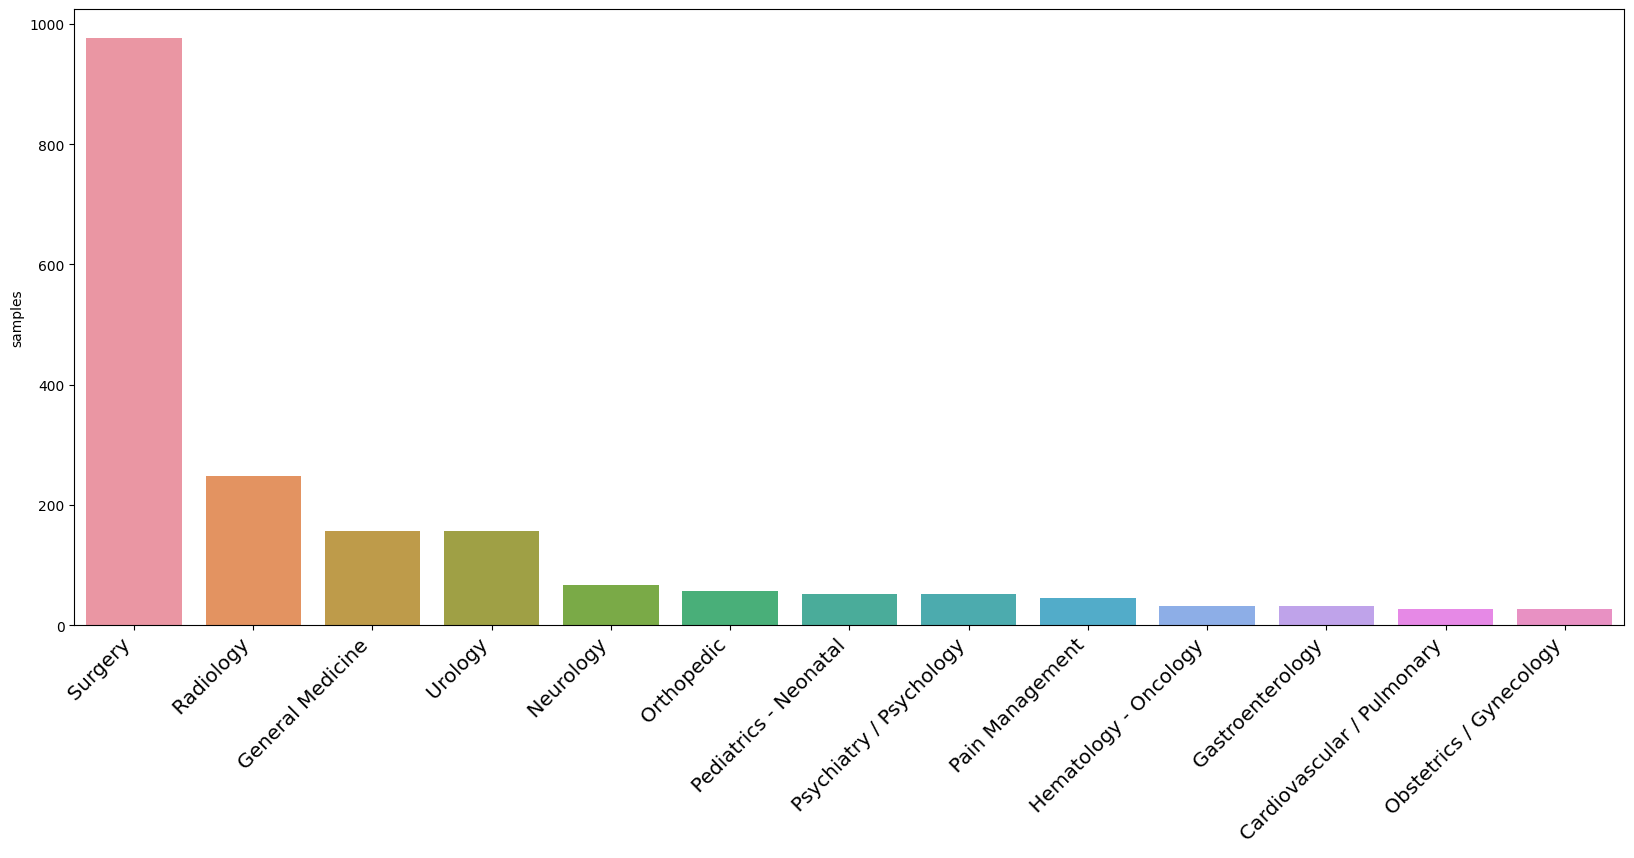

In [ ]:
plt.figure(figsize=(20,8))
x = medical_data.medical_specialty.value_counts()
sns.barplot(x=x.index,y=x)
#plt.tight_layout()
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.gca().set_ylabel('samples')

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max= 32)

In [ ]:
for i in range(0, len(label_count)-1):
    aug_val = int(round(label_count.transcription.max() / label_count.transcription[i],0)) - 1
    filtered_data = medical_data.loc[medical_data['medical_specialty'] == label_count.medical_specialty[i]]
    for j in filtered_data.index:
        temps=aug.augment(filtered_data.transcription[j],n=aug_val)
        for sent in temps:
            medical_data1 = {'transcription': sent, 'medical_specialty': label_count.medical_specialty[i]}
            medical_data = medical_data.append(medical_data1, ignore_index = True)
    #print(medical_data.shape)

Streaming output truncated to the last 5000 lines.
<ipython-input-85-05803fd8790b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medical_data = medical_data.append(medical_data1, ignore_index = True)
<ipython-input-85-05803fd8790b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medical_data = medical_data.append(medical_data1, ignore_index = True)
<ipython-input-85-05803fd8790b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medical_data = medical_data.append(medical_data1, ignore_index = True)
<ipython-input-85-05803fd8790b>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medical_data = medical_data.append(medical_data1, ignore

In [ ]:
medical_data.groupby('medical_specialty').count()['transcription'].reset_index()

,medical_specialty,transcription
0,Cardiovascular / Pulmonary,988
1,Gastroenterology,961
2,General Medicine,942
3,Hematology - Oncology,961
4,Neurology,1005
5,Obstetrics / Gynecology,988
6,Orthopedic,952
7,Pain Management,990
8,Pediatrics - Neonatal,988
9,Psychiatry / Psychology,969


Text(0, 0.5, 'samples')

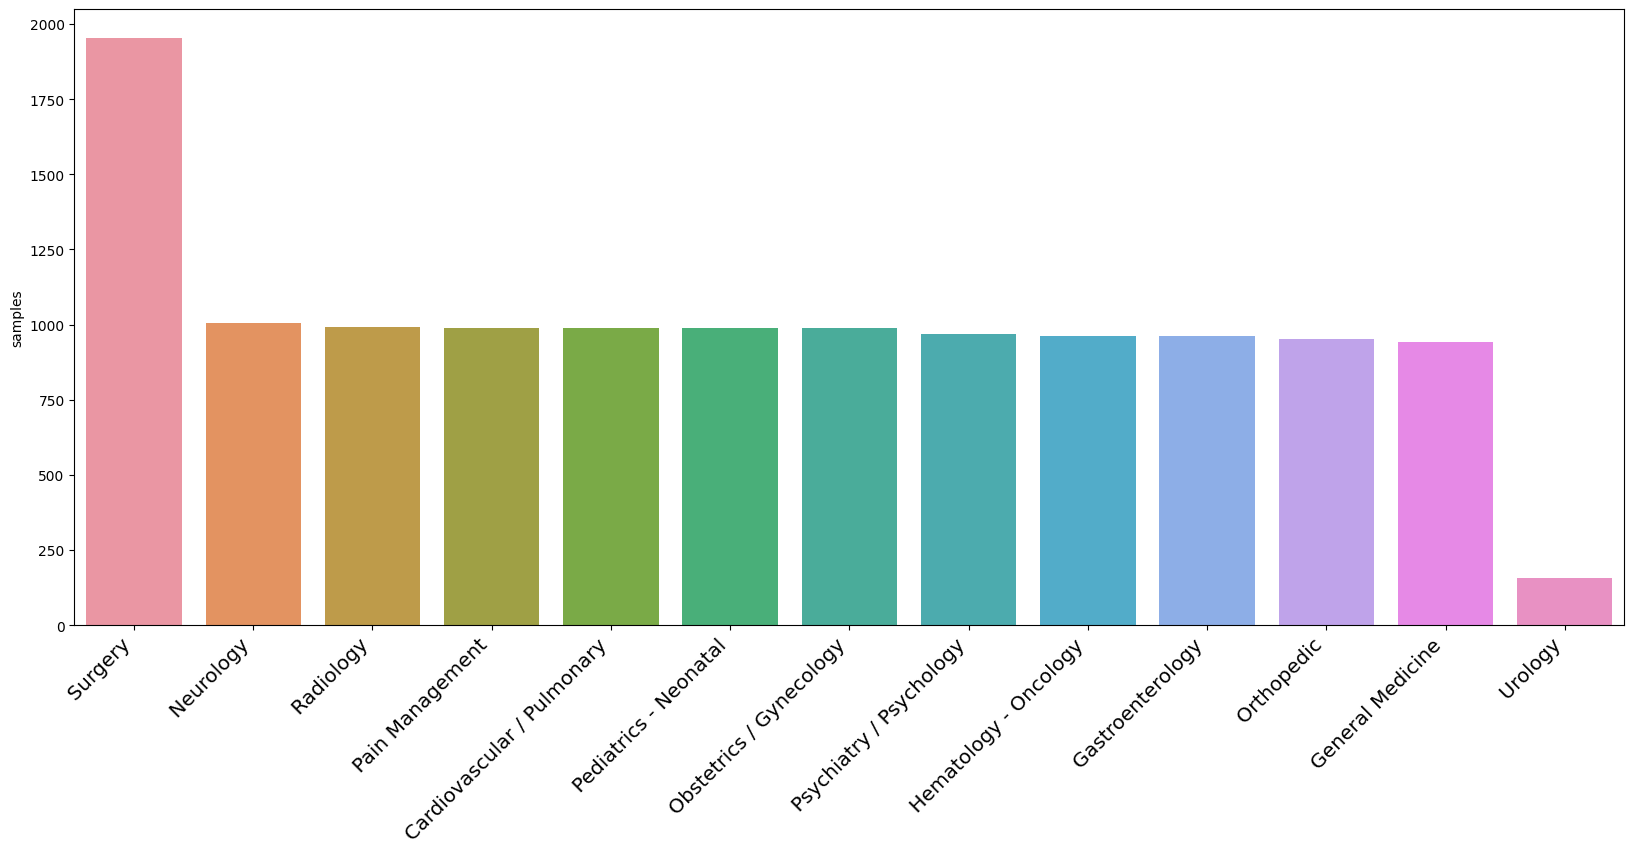

In [ ]:
plt.figure(figsize=(20,8))
x = medical_data.medical_specialty.value_counts()
sns.barplot(x=x.index,y=x)
#plt.tight_layout()
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.gca().set_ylabel('samples')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import regex as re
import string

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [ ]:
def text_preprocessing(data):
    data = str(data).lower()
    data = re.sub('\[.*?\]', '', data)
    data = re.sub('https?://\S+|www\.\S+', '', data)
    data = re.sub('<.*?>+', '', data)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', data)
    data = re.sub('\n', '', data)
    data = re.sub('\w*\d\w*', '', data)
    return data

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [ ]:
medical_data["transcription"] = medical_data["transcription"].apply(lambda text: text_preprocessing(text))

In [ ]:
medical_data["transcription"] = medical_data["transcription"].apply(lambda text: remove_stopwords(text))

In [ ]:
medical_data['tr_word_count']= medical_data['transcription'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
Y = pd.get_dummies(medical_data['medical_specialty']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (12844, 13)


array([[<Axes: title={'center': 'tr_word_count'}>]], dtype=object)

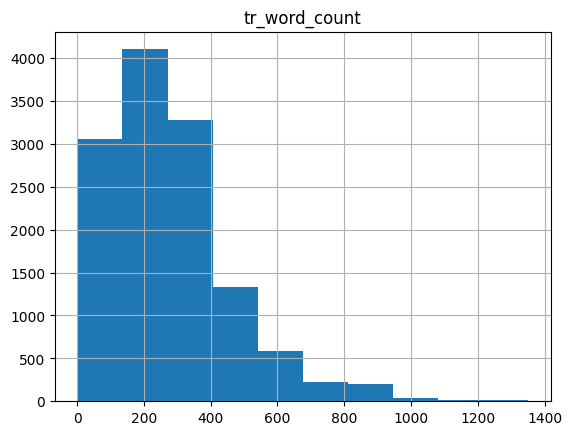

In [ ]:
medical_data.hist(column = 'tr_word_count') #most of the transcription are in range of 400 words

In [ ]:
documents = []

for doc in medical_data['transcription']:
    documents.append(doc.split(' '))

In [ ]:
documents[10]

['description',
 'patient',
 'placed',
 'supine',
 'position',
 'prepped',
 'draped',
 'usual',
 'manner',
 'left',
 'vas',
 'grasped',
 'fingers',
 'skin',
 'vas',
 'anesthetized',
 'local',
 'anesthesia',
 'vas',
 'grasped',
 'allis',
 'clamp',
 'skin',
 'incised',
 'vas',
 'deferens',
 'regrasped',
 'another',
 'allis',
 'clamp',
 'sheath',
 'incised',
 'scalpel',
 'elevated',
 'using',
 'iris',
 'scissors',
 'clamps',
 'used',
 'ligate',
 'vas',
 'deferens',
 'portion',
 'clamps',
 'excised',
 'ends',
 'vas',
 'clamped',
 'using',
 'hemoclips',
 'two',
 'testicular',
 'side',
 'one',
 'proximal',
 'side',
 'incision',
 'inspected',
 'hemostasis',
 'closed',
 'chromic',
 'catgut',
 'interrupted',
 'fashiona',
 'similar',
 'procedure',
 'carried',
 'right',
 'side',
 'dry',
 'sterile',
 'dressings',
 'applied',
 'patient',
 'put',
 'scrotal',
 'supporter',
 'procedure',
 'terminated']

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Training the Word2Vec model
model = Word2Vec(documents, #Word list
                   min_count=5, #Ignore all words with total frequency lower than this
                   workers=4, #Number of CPUs
                   vector_size=100,  #Embedding size
                   window=5 #Maximum Distance between current and predicted word
                  # iter=10   #Number of iterations over the text corpus
                  )

In [ ]:
#How many words in the model and how many features
model.wv.vectors.shape

(18463, 100)

In [ ]:
all_words = model.wv.index_to_key               #key_to_index
top_words = model.wv.index_to_key[0:5]
top_words

['patient', 'history', 'normal', 'right', 'left']

In [ ]:
print('Vocabulary size: %d' % len(all_words))

Vocabulary size: 18463


In [ ]:
# Finding Word Vectors
vector = model.wv['mmode']
#vector

KeyError: ignored

In [ ]:
# Most similar words
similar = model.wv.most_similar('anesthetic')
similar

[('anaesthesia', 0.8284993171691895),
 ('anesthesia', 0.825658917427063),
 ('anaesthetic', 0.7652208209037781),
 ('sedationcomplications', 0.6730448603630066),
 ('retrobulbar', 0.6603053212165833),
 ('interscalene', 0.644912838935852),
 ('shelter', 0.6420401930809021),
 ('footanesthesia', 0.6418959498405457),
 ('sedation', 0.629357635974884),
 ('local', 0.6241912245750427)]

In [ ]:
model.save("word2vec_Medical Specialty Classification5")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = medical_data['transcription']
y = Y

In [ ]:
#train test validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify = y_train)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(7706,)
(2569,)
(7706, 13)
(2569, 13)
(2569,)
(2569, 13)


In [ ]:
# building tokenizer to form a token for each word in each transcription

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

In [ ]:
#Convert words to integers

top_words = 10000 #reducing no of words to increase the processing speed

tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=padding_max_len, padding='post')

In [ ]:
# pad sequenc to make each transcription of the same size
#taking 300  based on avg length of the transcription form histogram
padding_max_len = 300

X_train = pad_sequences(X_train, maxlen=padding_max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=padding_max_len, padding='post')

In [ ]:
# Building embedding matrix from above Word2Vec model(pre trained model)

word2vec_model = Word2Vec.load("word2vec_Medical Specialty Classification5")  #loading the one created above

In [ ]:
word2vec_model.wv.vectors.shape

(18463, 100)

In [ ]:
#embedding length
embedding_vector_length = word2vec_model.wv.vectors.shape[1]
embedding_vector_length

100

In [ ]:
# building embedding matrix
#initailiazing matrix to all zeros

embedding_matrix = np.zeros((top_words+1, embedding_vector_length))

tokenizer.word_index.items()

for word,i in sorted(tokenizer.word_index.items(), key = lambda x:x[1]):
  if i > top_words:
    break
  if word in word2vec_model.wv.index_to_key:
    #print(word)
    embedding_vector = word2vec_model.wv[word]
    #print(embedding_vector)
    embedding_matrix[i] = embedding_vector
    #print(embedding_matrix[i])

In [ ]:
embedding_matrix[tokenizer.word_index['procedure']]

array([ 3.41293168e+00, -9.65209484e-01, -4.86570477e-01,  2.36135554e+00,
       -3.06551993e-01,  9.60025609e-01,  3.17150205e-01, -1.31073523e+00,
       -1.36185145e+00, -7.27756143e-01, -2.42238355e+00,  1.45185697e+00,
       -8.75656605e-02, -1.37832761e+00,  3.52440095e+00,  2.49607038e+00,
        6.11931324e-01,  1.44597685e+00,  3.88287812e-01,  2.04611850e+00,
        1.94510925e+00, -1.60901785e+00,  8.48328397e-02, -1.24083281e+00,
       -3.60524392e+00,  1.80027878e+00,  2.16466641e+00,  3.34977460e+00,
        2.37779689e+00, -3.57196659e-01,  8.31549838e-02, -7.65322000e-02,
        7.49454141e-01,  6.39497787e-02, -3.50288935e-02, -1.28929067e+00,
        4.52360570e-01,  1.24956393e+00,  3.06422532e-01,  1.38597190e+00,
        3.57696962e+00,  2.50655413e+00,  4.43496287e-01,  1.61804616e+00,
        1.71078396e+00,  2.20248103e+00, -5.65970778e-01,  4.87429708e-01,
        2.00376940e+00, -4.08230394e-01,  7.52641618e-01,  2.27614641e+00,
        1.22893405e+00, -

In [ ]:
# Create an embedding layer
#Output from Embedding is 3 dimension
#batch_size x max_review_length x embedding_vector_length

embedding_layer = Embedding(top_words+1, embedding_vector_length, weights=[embedding_matrix],
                             input_length=padding_max_len,trainable=False)

In [ ]:
# Using LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Embedding,LSTM ,Bidirectional
from tensorflow.keras import regularizers

In [ ]:
model1 = Sequential()

model1.add(embedding_layer)

#LSTM
model1.add(LSTM(32))

#dense layer
model1.add(Dense(units=21,activation='softmax'))

model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000100   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 21)                693       
                                                                 
Total params: 1,017,817
Trainable params: 17,717
Non-trainable params: 1,000,100
_________________________________________________________________
None


In [ ]:
model_history = model1.fit(X_train, y_train, batch_size=200, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
50/50 [==============================] - 10s 28ms/step - loss: 2.9790 - accuracy: 0.0905 - val_loss: 2.9157 - val_accuracy: 0.1220
Epoch 2/30
50/50 [==============================] - 1s 15ms/step - loss: 2.8447 - accuracy: 0.1516 - val_loss: 2.7701 - val_accuracy: 0.1576
Epoch 3/30
50/50 [==============================] - 1s 13ms/step - loss: 2.6609 - accuracy: 0.1789 - val_loss: 2.6398 - val_accuracy: 0.1869
Epoch 4/30
50/50 [==============================] - 1s 13ms/step - loss: 2.5856 - accuracy: 0.2106 - val_loss: 2.5886 - val_accuracy: 0.2074
Epoch 5/30
50/50 [==============================] - 1s 15ms/step - loss: 2.5906 - accuracy: 0.2194 - val_loss: 2.5933 - val_accuracy: 0.2117
Epoch 6/30
50/50 [==============================] - 1s 14ms/step - loss: 2.4819 - accuracy: 0.2477 - val_loss: 2.4909 - val_accuracy: 0.2367
Epoch 7/30
50/50 [==============================] - 1s 14ms/step - loss: 2.4142 - accuracy: 0.2624 - val_loss: 2.4336 - val_accuracy: 0.2582
Epoch 8/30
5

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model4_2.predict(X_test)

52/52 [==============================] - 7s 130ms/step


In [ ]:
y_pred = model4_2.predict(X_test)

81/81 [==============================] - 9s 97ms/step


In [ ]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [ ]:
y_pred

array([[6.2994204e-02, 5.8687247e-02, 4.2674164e-03, ..., 8.1588186e-02,
        8.5589066e-02, 1.6396180e-02],
       [6.8781257e-02, 2.8321361e-03, 1.2289364e-02, ..., 2.0797538e-02,
        7.5929933e-03, 1.4218712e-01],
       [5.8723910e-04, 1.1353049e-04, 9.5836151e-01, ..., 1.6202074e-03,
        1.1340362e-05, 2.7259069e-03],
       ...,
       [1.1308411e-02, 1.7481193e-02, 3.5450168e-02, ..., 1.3260958e-02,
        1.6033428e-02, 5.3669844e-02],
       [6.9917701e-03, 2.4219735e-02, 9.5698684e-03, ..., 1.1344337e-02,
        3.8219668e-02, 2.2944614e-02],
       [3.3623006e-02, 3.8624961e-02, 6.4570009e-04, ..., 1.7785506e-01,
        3.5911515e-02, 3.1830426e-02]], dtype=float32)

In [ ]:
import keras
y_pred = keras.utils.to_categorical(y_pred)

In [ ]:
print(metrics.classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=medical_data['medical_specialty'].unique()))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.99      0.99      0.99       198
                  Neurology       0.99      0.99      0.99       192
                    Urology       0.97      0.98      0.98       188
           General Medicine       0.99      1.00      0.99       192
                    Surgery       1.00      1.00      1.00       201
                  Radiology       1.00      0.99      1.00       198
    Psychiatry / Psychology       0.97      0.99      0.98       190
      Pediatrics - Neonatal       0.97      0.98      0.97       198
            Pain Management       0.99      0.99      0.99       198
                 Orthopedic       1.00      1.00      1.00       194
    Obstetrics / Gynecology       0.98      0.96      0.97       199
      Hematology - Oncology       0.94      0.98      0.96       390
           Gastroenterology       0.88      0.23      0.36        31

                   accuracy     

In [ ]:
print(metrics.classification_report(np.argmax(y_val, axis=1), np.argmax(y_pred1, axis=1), target_names=medical_data['medical_specialty'].unique()))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.98      1.00      0.99       182
                    Urology       0.98      1.00      0.99       177
           General Medicine       0.99      1.00      1.00       183
                    Surgery       0.96      0.99      0.98       179
                  Radiology       0.98      0.99      0.98       185
      Pediatrics - Neonatal       0.99      0.99      0.99       180
            Pain Management       0.96      0.94      0.95       181
                 Orthopedic       0.96      0.97      0.96       364
                  Neurology       0.88      0.25      0.39        28

                   accuracy                           0.97      1659
                  macro avg       0.96      0.91      0.92      1659
               weighted avg       0.97      0.97      0.97      1659



In [ ]:
from sklearn import metrics
print(metrics.classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=medical_data['medical_specialty'].unique()))

                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.98      1.00      0.99       182
                    Urology       0.99      0.99      0.99       177
           General Medicine       0.98      0.99      0.98       182
                    Surgery       0.99      1.00      0.99       179
                  Radiology       0.99      0.99      0.99       185
      Pediatrics - Neonatal       1.00      1.00      1.00       180
            Pain Management       0.97      0.97      0.97       182
                 Orthopedic       0.95      0.98      0.96       364
                  Neurology       0.88      0.25      0.39        28

                   accuracy                           0.98      1659
                  macro avg       0.97      0.91      0.92      1659
               weighted avg       0.98      0.98      0.97      1659



In [ ]:
from sklearn import metrics
print(metrics.classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=medical_data['medical_specialty'].unique()))

                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.34      0.14      0.20       185
                   Dermatology       0.17      0.19      0.18       185
                       Surgery       0.57      0.82      0.67       156
              General Medicine       0.91      0.13      0.23       157
                    Orthopedic       0.67      0.25      0.37       150
              Gastroenterology       0.84      0.27      0.41       154
               Pain Management       0.42      0.03      0.06       146
    Consult - History and Phy.       0.20      0.04      0.07       150
                     Radiology       0.48      0.20      0.28       158
         Hematology - Oncology       0.52      0.21      0.30       152
                     Neurology       0.37      0.08      0.14       166
                    Nephrology       0.64      0.46      0.53       161
                      Podiatry       0.15      0.83      0.25  

In [ ]:
conf_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ValueError: ignored

In [ ]:
y_pred.shape

(3312, 21)

In [ ]:
y_test.shape

(3312, 21)

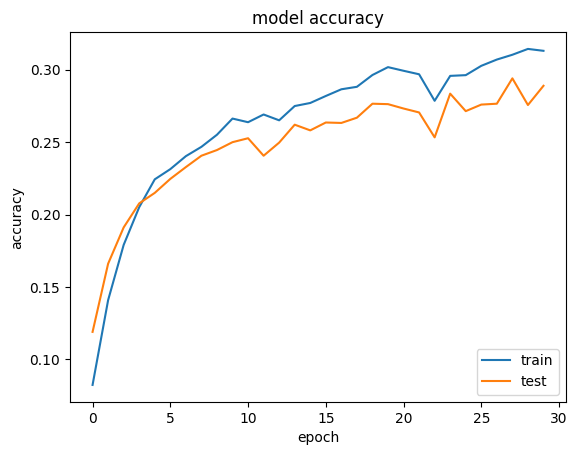

In [ ]:
from matplotlib import pyplot as plt
# visualise training history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [ ]:
model4 = Sequential()

model4.add(embedding_layer)

model4.add(Bidirectional(LSTM(64)))

model4.add(Dense(units=21,activation='softmax'))

model4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000100   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 21)                2709      
                                                                 
Total params: 1,087,289
Trainable params: 87,189
Non-trainable params: 1,000,100
_________________________________________________________________
None


In [ ]:
model_history = model4.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
100/100 [==============================] - 10s 44ms/step - loss: 2.3586 - accuracy: 0.3435 - val_loss: 1.7384 - val_accuracy: 0.5211
Epoch 2/10
100/100 [==============================] - 2s 25ms/step - loss: 1.3934 - accuracy: 0.6021 - val_loss: 1.2432 - val_accuracy: 0.6295
Epoch 3/10
100/100 [==============================] - 2s 25ms/step - loss: 1.0476 - accuracy: 0.6842 - val_loss: 1.0428 - val_accuracy: 0.6754
Epoch 4/10
100/100 [==============================] - 2s 25ms/step - loss: 0.8720 - accuracy: 0.7171 - val_loss: 0.9808 - val_accuracy: 0.6866
Epoch 5/10
100/100 [==============================] - 5s 46ms/step - loss: 0.7763 - accuracy: 0.7365 - val_loss: 0.9212 - val_accuracy: 0.6920
Epoch 6/10
100/100 [==============================] - 4s 42ms/step - loss: 0.7024 - accuracy: 0.7512 - val_loss: 0.8811 - val_accuracy: 0.7062
Epoch 7/10
100/100 [==============================] - 2s 25ms/step - loss: 0.6516 - accuracy: 0.7655 - val_loss: 0.8694 - val_accuracy: 0.702

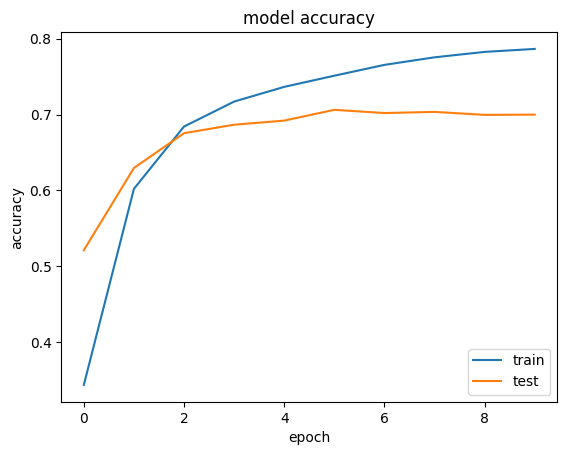

In [ ]:
from matplotlib import pyplot as plt
# visualise training history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

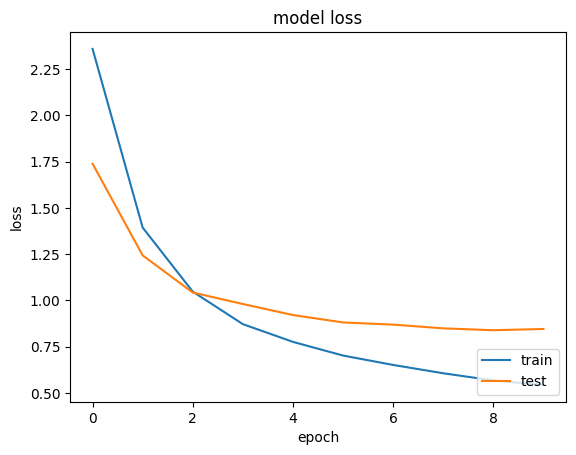

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()


In [ ]:
#improving above overfitted model:

model4_1 = Sequential()

model4_1.add(embedding_layer)

model4_1.add(Bidirectional(LSTM(32)))

model4_1.add(Dense(units=21,activation='softmax'))

model4_1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(model4_1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000100   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               34048     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 21)                1365      
                                                                 
Total params: 1,035,513
Trainable params: 35,413
Non-trainable params: 1,000,100
_________________________________________________________________
None


In [ ]:
model_history = model4_1.fit(X_train, y_train, batch_size=100, epochs=8, validation_data=(X_val, y_val))

Epoch 1/8
100/100 [==============================] - 8s 34ms/step - loss: 2.6663 - accuracy: 0.2542 - val_loss: 2.3343 - val_accuracy: 0.3499
Epoch 2/8
100/100 [==============================] - 2s 21ms/step - loss: 1.9575 - accuracy: 0.4690 - val_loss: 1.6997 - val_accuracy: 0.5408
Epoch 3/8
100/100 [==============================] - 2s 22ms/step - loss: 1.4590 - accuracy: 0.5999 - val_loss: 1.3930 - val_accuracy: 0.6036
Epoch 4/8
100/100 [==============================] - 3s 30ms/step - loss: 1.2077 - accuracy: 0.6538 - val_loss: 1.2312 - val_accuracy: 0.6377
Epoch 5/8
100/100 [==============================] - 3s 28ms/step - loss: 1.0559 - accuracy: 0.6856 - val_loss: 1.1328 - val_accuracy: 0.6600
Epoch 6/8
100/100 [==============================] - 2s 22ms/step - loss: 0.9440 - accuracy: 0.7132 - val_loss: 1.0736 - val_accuracy: 0.6652
Epoch 7/8
100/100 [==============================] - 2s 22ms/step - loss: 0.8860 - accuracy: 0.7225 - val_loss: 1.0450 - val_accuracy: 0.6760
Epoch 

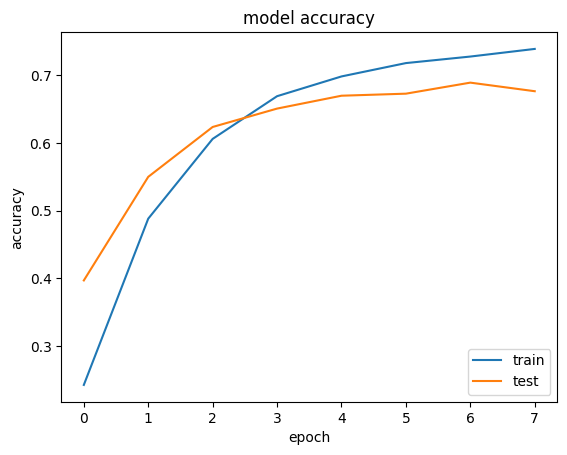

In [ ]:
from matplotlib import pyplot as plt
# visualise training history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

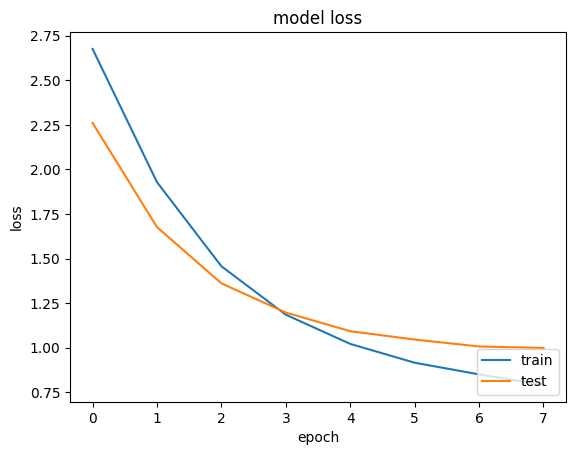

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

In [ ]:
#improving above overfitted model:

model4_2 = Sequential()

model4_2.add(embedding_layer)

model4_2.add(Bidirectional(LSTM(32 , dropout=0.1, recurrent_dropout=0.1)))

model4_2.add(Dense(units=13,activation='softmax'))

model4_2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(model4_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          1000100   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               34048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 13)                845       
                                                                 
Total params: 1,034,993
Trainable params: 34,893
Non-trainable params: 1,000,100
_________________________________________________________________
None


In [ ]:
model_history = model4_2.fit(X_train, y_train, batch_size=100, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
78/78 [==============================] - 107s 1s/step - loss: 2.0466 - accuracy: 0.3907 - val_loss: 1.5304 - val_accuracy: 0.5854
Epoch 2/30
78/78 [==============================] - 96s 1s/step - loss: 1.2304 - accuracy: 0.6882 - val_loss: 0.9063 - val_accuracy: 0.7937
Epoch 3/30
78/78 [==============================] - 99s 1s/step - loss: 0.7511 - accuracy: 0.8220 - val_loss: 0.5889 - val_accuracy: 0.8505
Epoch 4/30
78/78 [==============================] - 97s 1s/step - loss: 0.5139 - accuracy: 0.8802 - val_loss: 0.4298 - val_accuracy: 0.8976
Epoch 5/30
78/78 [==============================] - 94s 1s/step - loss: 0.3760 - accuracy: 0.9179 - val_loss: 0.3255 - val_accuracy: 0.9194
Epoch 6/30
78/78 [==============================] - 98s 1s/step - loss: 0.3029 - accuracy: 0.9378 - val_loss: 0.2744 - val_accuracy: 0.9323
Epoch 7/30
78/78 [==============================] - 95s 1s/step - loss: 0.2386 - accuracy: 0.9516 - val_loss: 0.2207 - val_accuracy: 0.9451
Epoch 8/30
78/78 [=

In [ ]:
model4_2.save_weights('/content/gdrive/My Drive/lstm4_c.h5')

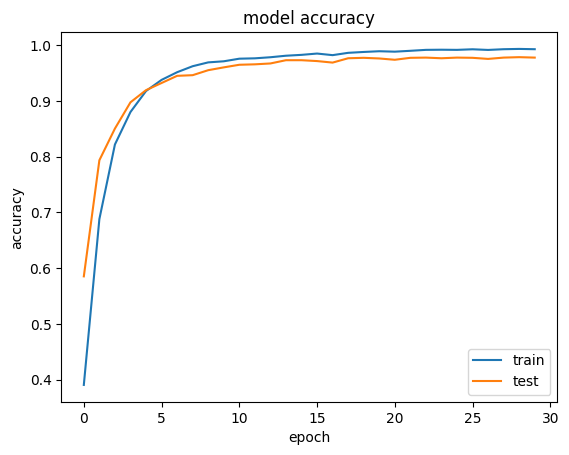

In [ ]:
from matplotlib import pyplot as plt
# visualise training history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

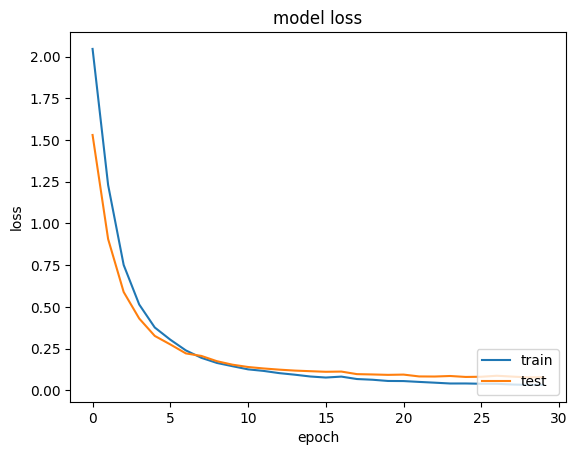

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()